In [17]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(333)

<class 'matplotlib.figure.Figure'>
['ArtistList', '_AxesBase__clear', '_PROPERTIES_EXCLUDED_FROM_SET', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_text', '_adjustable', '_agg_filter', '_alias_map', '_alpha', '_anchor', '_animated', '_aspect', '_autotitlepos', '_axes', '_axes_locator', '_axis_map', '_axis_names', '_axisbelow', '_box_aspect', '_callbacks', '_check_no_units', '_children', '_clipon', '_clippath', '_cm_set', '_colorbars', '_convert_dx', '_current_image', '_different_canvas', '_errorevery_to_mask', '_facecolor', '_fill_between_process_units', '_fill_between_x_or_y', '_forward_navigation_events', '_frameon', '_fully_clipped_t

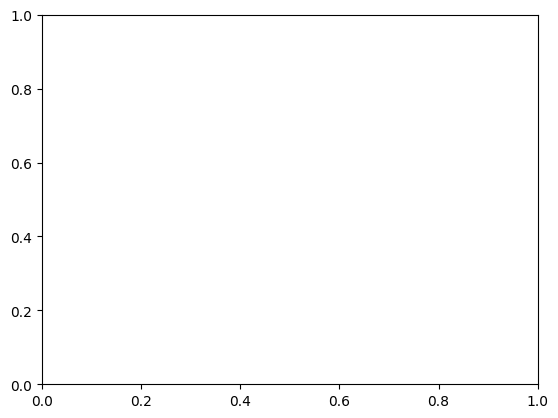

In [18]:
fig, _ = plt.subplots()
print(type(fig))
print(dir(fig.axes[0]))

In [20]:
one_tick = fig.axes[0].yaxis.get_major_ticks()[1].label1
print(one_tick)

Text(0, 0.2, '0.2')


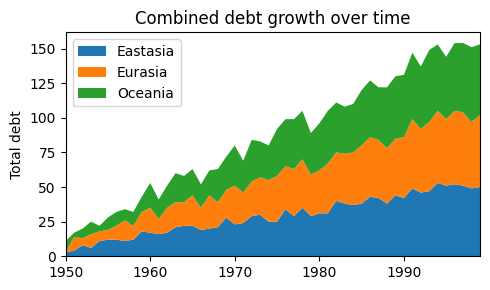

In [21]:
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

fig, ax = plt.subplots(figsize=(5, 3))
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()

plt.show();

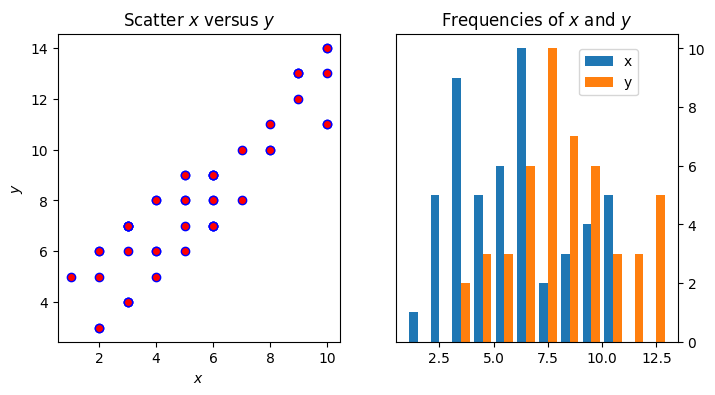

In [22]:
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.hist(data, bins=np.arange(data.min(), data.max()), label=('x', 'y'))
ax2.legend(loc=(.65, .8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

plt.show()

In [23]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from io import BytesIO
import tarfile
from urllib.request import urlopen

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

In [24]:
y = housing[:, -1]
pop, age = housing[:, [4, 7]].T

In [25]:
import matplotlib.pyplot as plt

def add_titlebox(ax, text):
    ax.text(.55, .8, text, horizontalalignment='center', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=.6), fontsize=12.5)
    return ax

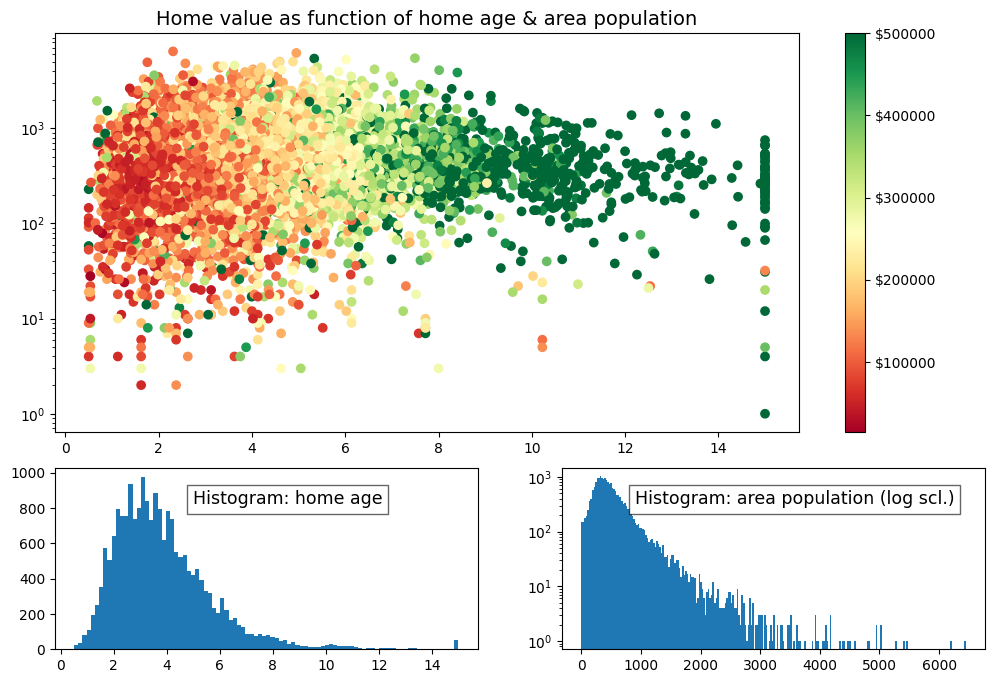

In [26]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))
ax1.set_title('Home value as function of home age & area population', fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')

ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')

plt.show()

In [27]:
x = np.diag(np.arange(2, 12))[::-1]
x[np.diag_indices_from(x[::-1])] = np.arange(2, 12)
x2 = np.arange(x.size).reshape(x.shape)

In [28]:
print(x, '\n\n', x2)

[[ 2  0  0  0  0  0  0  0  0 11]
 [ 0  3  0  0  0  0  0  0 10  0]
 [ 0  0  4  0  0  0  0  9  0  0]
 [ 0  0  0  5  0  0  8  0  0  0]
 [ 0  0  0  0  6  7  0  0  0  0]
 [ 0  0  0  0  6  7  0  0  0  0]
 [ 0  0  0  5  0  0  8  0  0  0]
 [ 0  0  4  0  0  0  0  9  0  0]
 [ 0  3  0  0  0  0  0  0 10  0]
 [ 2  0  0  0  0  0  0  0  0 11]] 

 [[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


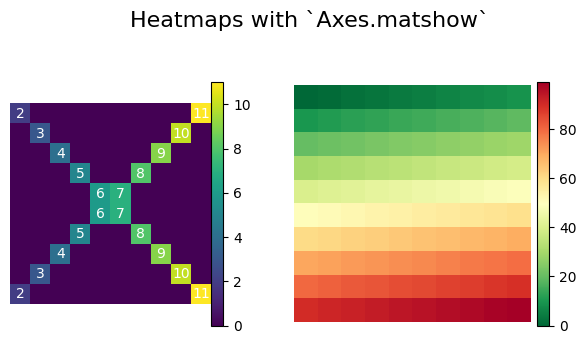

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
img1 = ax1.matshow(x)
ax1.axis('off')
img2 = ax2.matshow(x2, cmap='RdYlGn_r')
ax2.axis('off')

for i, j in zip(*x.nonzero()):
  ax1.text(j, i, x[i, j], color='white', ha='center', va='center')

plt.colorbar(img2, ax=[ax1, ax2], shrink=.79, pad=.01)
plt.colorbar(img1, ax=[ax1], shrink=.79, pad=.001)
fig.suptitle('Heatmaps with `Axes.matshow`', fontsize=16)

plt.show()

/tmp/ipython-input-536942263.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  vix = pd.read_csv(url, index_col=0, parse_dates=True, na_values='.', infer_datetime_format=True).dropna()


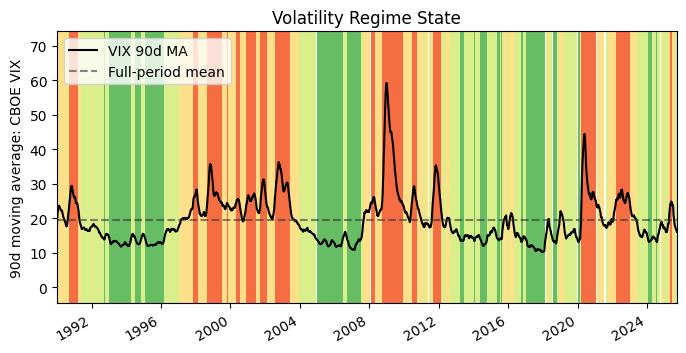

In [30]:
import pandas as pd


url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=VIXCLS'
vix = pd.read_csv(url, index_col=0, parse_dates=True, na_values='.', infer_datetime_format=True).dropna()
vix = vix.squeeze()
ma = vix.rolling('90d').mean()
state = pd.cut(ma, bins=[-np.inf, 14, 18, 24, np.inf], labels=range(4))
cmap = plt.get_cmap('RdYlGn_r')
ma.plot(color='black', linewidth=1.5, marker='', figsize=(8, 4), label='VIX 90d MA')

ax = plt.gca()
ax.set_xlabel('')
ax.set_ylabel('90d moving average: CBOE VIX')
ax.set_title('Volatility Regime State')
ax.grid(False)
ax.set_xlim(xmin=ma.index[0], xmax=ma.index[-1])

trans = ax.get_xaxis_transform()

for i, color in enumerate(cmap([.2, .4, .6, .8])):
  ax.fill_between(ma.index, 0, 1, where=(state == i), facecolor=color, transform=trans)

ax.axhline(vix.mean(), linestyle='dashed', color='xkcd:dark grey', alpha=.6, label='Full-period mean', marker='')
ax.legend(loc='upper left')

plt.show();